In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/watai-open-project-f23-beginner-classical-ml/beginner_data_cml.npz


In [2]:
# IMPORT STATEMENTS...
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

#LOADING DATA...
with np.load("/kaggle/input/watai-open-project-f23-beginner-classical-ml/beginner_data_cml.npz") as data:
    X_train = data['train_images']  # Shape (8981, 64, 64, 3)
    y_train = data['train_labels']  # Shape (8981,)
    X_test = data['test_images']  # Shape (1800, 64, 64, 3)
    # we don't have y_test because the labels for the test is the basis of the scoring in the competition...
    
#creating target vectors for the classification task...
y_train_1 = (y_train == 1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Reshape the image data to 2D
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flatten each image
# Make sure to apply the same reshaping procedure to the test data when you want to make predictions on it.

# Create the SGDClassifier
# Example of reducing complexity
clf = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
clf.fit(X_train_flattened, y_train)

#dosen't have decision_function() method, so we need its predict_proba() method that returns class probabilties for each instance
y_probas_forest = cross_val_predict(clf, X_train_flattened, y_train_1, cv=3, method="predict_proba")
y_probas_forest[:2]

array([[0.38302858, 0.61697142],
       [0.88051139, 0.11948861]])

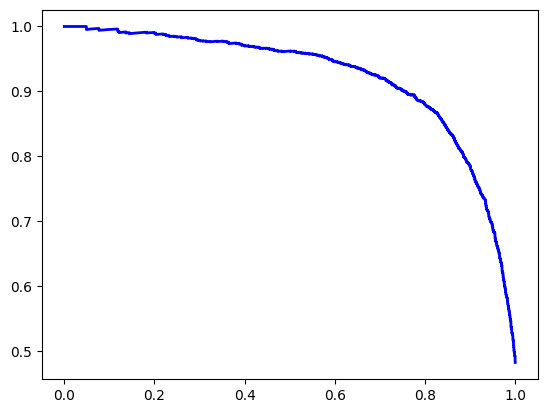

In [4]:
#PLOTTING THE MODEL
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_1, y_scores_forest)
# precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)


plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.show()

In [5]:
y_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_1, y_pred_forest)

0.8467374810318664

In [6]:
roc_auc_score(y_train_1, y_scores_forest)

0.9215707857284924

In [7]:
precision_score(y_train_1, y_pred_forest)

0.8576495625443368

In [8]:
recall_score(y_train_1, y_pred_forest)

0.8360995850622407

In [9]:
# Reshape the image data to a 2D array (flattening)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Now you can make predictions
predictions = clf.predict(X_test_flattened)

N_test = X_test.shape[0]
df = pd.DataFrame({
    "Index": np.arange(N_test),
    "Label": predictions
})
df.to_csv("submission.csv", index=False)